## ML Model creation using  Keras(Neural Networks)
Student: Chris Kogut

UofT 2019

Predicting customer churn usin(Keras).

Dataset contains 21 columns and 333 records


In [0]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras


In [0]:
np.random.seed(23)
classes= 2

In [0]:
#prepare axccess to GDrive
#Mount your Google drive so you can read them easilu
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Import data
filePath ="/content/gdrive/My Drive/Colab Notebooks/ProjectTelecom/churn.csv"
data = pd.read_csv(filePath)
#data = np.loadtxt(filePath,delimiter=",")

In [0]:
data.head(5)

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [0]:
#data cleanup
#change state ,churn international plan and vmail to  to factor
data['Churn'] = data['Churn'].astype('category')
data['State'] = data['State'].astype('category')
data['Intl Plan'] = data['Intl Plan'].astype('category')
data['VMail Plan'] = data['VMail Plan'].astype('category')
data['Intl Plan'] = np.where(data['Intl Plan'] == 'yes',1,0)
data['VMail Plan']= np.where(data['VMail Plan'] == 'yes',1,0)


#drop phone column as it will not be beneficial to model creation
data = data.drop(['Phone'], axis=1)

#convert churn to binary  (0,1)
data['Churn'] = np.where(data['Churn'] == 'True.',1,0)



In [0]:
#data should be clean ready for further processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State             3333 non-null category
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Intl Plan         3333 non-null int64
VMail Plan        3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
dtypes: category(1), float64(8), int64(11)
memory usage: 501.0 KB


In [0]:
data.head(1)

,State,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


 **
Next step is to look at the data closer.
Data Normality Check etc.**

In [0]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

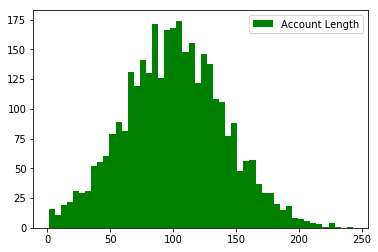

In [0]:
# Diaply histogra, distribution for each field 

import warnings
warnings.filterwarnings("ignore")

#for x in range (1,10):
#  _= plt.hist(data.iloc[:,x] , 50, normed=0, facecolor='green', alpha=1)
#  plt.legend([list(data)[x]])
_= plt.hist(data.iloc[:,1] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[1]])


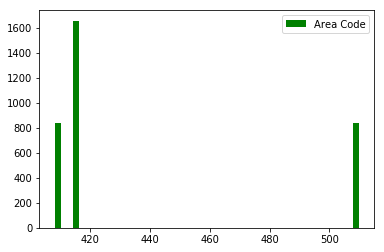

In [0]:
_= plt.hist(data.iloc[:,2] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[2]])


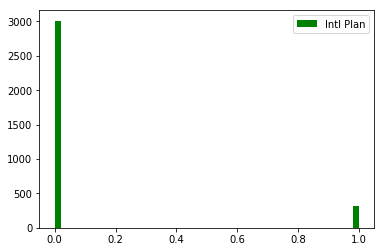

In [0]:
_= plt.hist(data.iloc[:,3] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[3]])

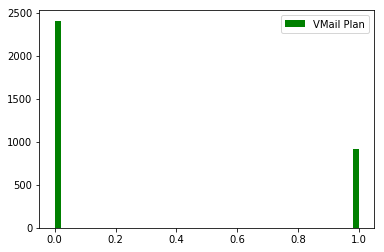

In [0]:
_= plt.hist(data.iloc[:,4] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[4]])


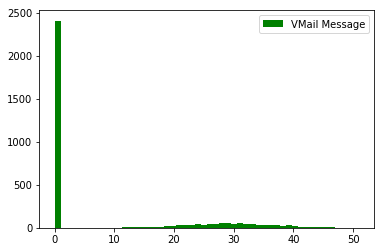

In [0]:
_= plt.hist(data.iloc[:,5] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[5]])

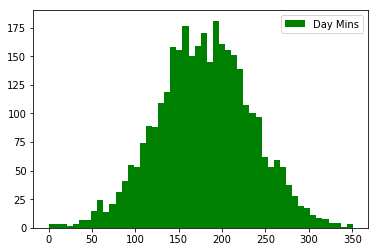

In [0]:
_= plt.hist(data.iloc[:,6] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[6]])

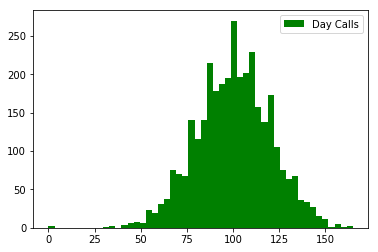

In [0]:
_= plt.hist(data.iloc[:,7] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[7]])

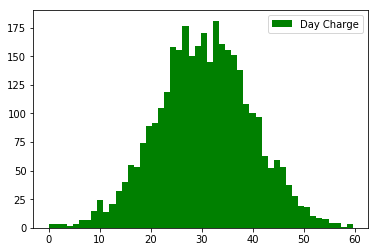

In [0]:
_= plt.hist(data.iloc[:,8] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[8]])

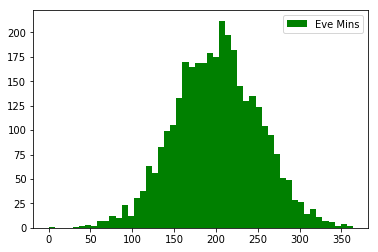

In [0]:
_= plt.hist(data.iloc[:,9] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[9]])

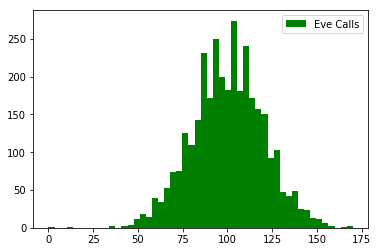

In [0]:
_= plt.hist(data.iloc[:,10] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[10]])

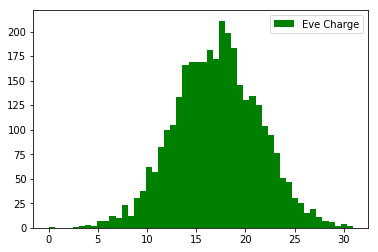

In [0]:
_= plt.hist(data.iloc[:,11] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[11]])

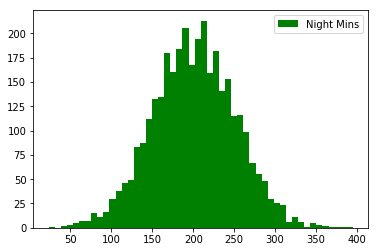

In [0]:
_= plt.hist(data.iloc[:,12] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[12]])

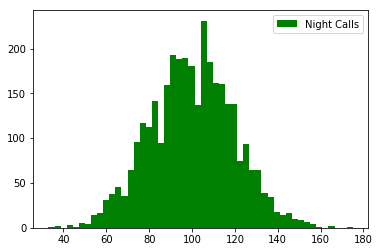

In [0]:
_= plt.hist(data.iloc[:,13] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[13]])

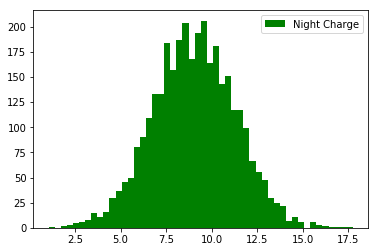

In [0]:
_= plt.hist(data.iloc[:,14] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[14]])

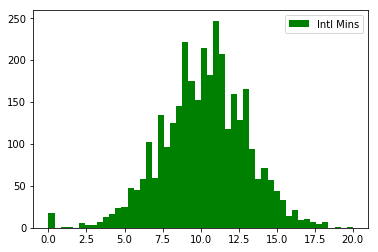

In [0]:
_= plt.hist(data.iloc[:,15] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[15]])

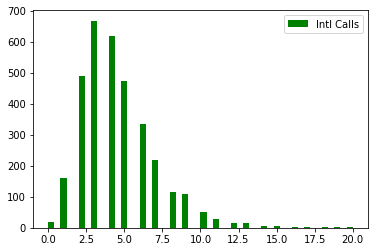

In [0]:
_= plt.hist(data.iloc[:,16] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[16]])

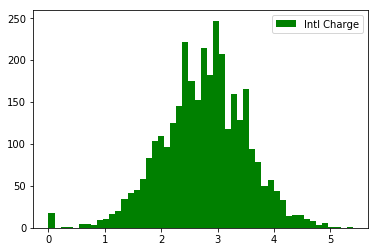

In [0]:
_= plt.hist(data.iloc[:,17] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[17]])

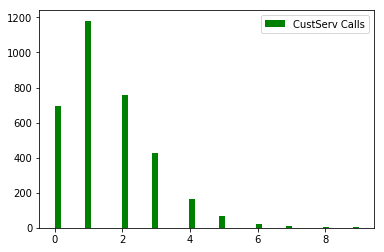

In [0]:
_= plt.hist(data.iloc[:,18] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[18]])

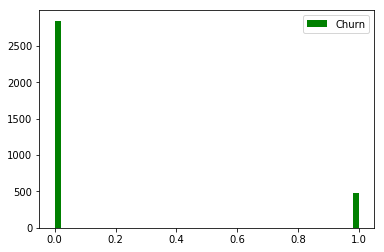

In [0]:
_= plt.hist(data.iloc[:,19] , 50, normed=0, facecolor='green', alpha=1)
plt.legend([list(data)[19]])

Churn data is highly imbalanced churn ~500  vs no churn 2,700. It would make send to rebalance the set (will be done later)

Finding "Charge" and "Mins" attributes have linear correlation.

Minutes , "Mins"" is considered redundant for each Type and can be removed.
Also, dopping "State" attribute


In [0]:
#drop 
#Day Mins
#Eve Mins
#Night Mins	
#Intl Mins	
#
#and  State
data = data.drop(['State','Day Mins','Eve Mins','Night Mins','Intl Mins'], axis=1)


**Final Look at the data before building the model**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Intl Plan         3333 non-null int64
VMail Plan        3333 non-null int64
VMail Message     3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
dtypes: float64(4), int64(11)
memory usage: 390.7 KB


In [0]:
#from sklearn.model_selection import train_test_split  80/20 split
train_set, test_set = train_test_split( data, test_size=0.2, random_state=44)

In [0]:
#**********************  CHURN = y  ***********************
target = 'Churn'
features = list(data.columns)
features = [f for f in features if f!=target]

In [0]:
features

['Account Length',
 'Area Code',
 'Intl Plan',
 'VMail Plan',
 'VMail Message',
 'Day Calls',
 'Day Charge',
 'Eve Calls',
 'Eve Charge',
 'Night Calls',
 'Night Charge',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls']

In [0]:
#pass  dataset to Keros
#train_set=data

#Create training set 
X_tr = train_set[features]
y_tr = train_set[[target]]
#create test set
X_te = test_set[features]
y_te = test_set[[target]]

In [0]:
#VERY Important! scale data between 0,1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_tr = scaler.fit_transform(X_tr)
X_tr = pd.DataFrame(X_tr)

X_te = scaler.fit_transform(X_te)
X_te = pd.DataFrame(X_te)


In [0]:
y_tr=keras.utils.to_categorical(y_tr)
y_teo=y_te
y_te = keras.utils.to_categorical(y_te)


In [0]:
#START BUILDING THE MODEL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#output classes (churn: yes,no)
classes=2
# define baseline model
def baseline_model_churn():
	# create model
	model= Sequential()
	model.add(Dense(20,input_dim=len(data.columns)-1,activation='relu')) 
  # 20 neurons 15 attributes
  #removed this node as is was causing overfit
	model.add(Dense(10,activation='relu')) 
	model.add(Dense(4,activation='relu')) 
	model.add(Dense(classes,kernel_initializer = 'uniform',activation='sigmoid'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
	#using adam optimizer
	return model

In [0]:
# model
model = baseline_model_churn()
history = model.fit( X_tr, y_tr, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
# list all data in history  model.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


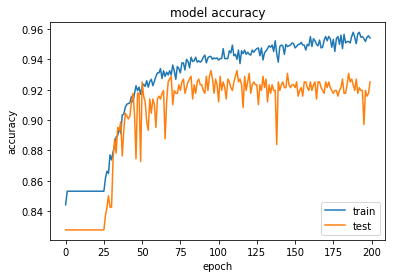

In [0]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

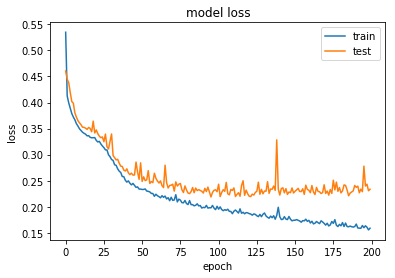

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:


#Now same using Keras Classifier wth KFold
##
##
##
estimator = KerasClassifier(build_fn=baseline_model_churn, epochs=100, batch_size=10, verbose=0)

In [0]:
seed= 34
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)


In [0]:
results = cross_val_score(estimator, X_tr, y_tr, cv=kfold)



In [0]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 90.85% (0.75%)


In [0]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

test_loss, test_acc = model.evaluate(X_te, y_te)



667/667 [==============================] - 0s 33us/step


In [0]:
print('Churn Test accuracy:', test_acc*100)

Churn Test accuracy: 91.30434776353336


In [0]:
Y_pred = model.predict(X_te)
y_pred = np.argmax(Y_pred, axis=1)


[[587  80]
 [  0   0]]


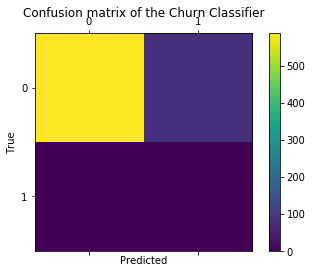

In [0]:
#Let'ss create confusion matrix
import matplotlib.pyplot as plt

labels = [ 0,1]
y_te1 = np.argmax(y_teo, axis=1)
cm = confusion_matrix(y_te1, y_pred, labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Churn Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Conclusion:
Tried various configurations. Overall accuracy of the model performs > 88%, however, confusion matrix is not showing Churn correctly... needs more work.

It was very good exercise for me. 
In this project I was able to evaluate Telecom data and prepare classification model template that can be used for other projects.

Next steps enhancements: 
- ability to save the model and restore/use it

